In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'CustomerChurnData.csv'
df = pd.read_csv(file_path)
import warnings

warnings.filterwarnings('ignore')
sns.set_style()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Normallik, Çarpıklık ,Basıklık

#### Shapiro-wilks

In [4]:
from scipy import stats


numeric_columns = df.select_dtypes(include=['float64', 'int64'])


for column in numeric_columns.columns:
    stat, p_value = stats.shapiro(df[column])
    print(f'{column} için Shapiro-Wilk testi:')
    print(f'  Test istatistiği: {stat}')
    print(f'  p-değeri: {p_value}\n')

    if p_value < 0.05:
        print(f'{column} verisi normal dağılmıyor.\n')
    else:
        print(f'{column} verisi normal dağılıyor.\n')

tenure için Shapiro-Wilk testi:
  Test istatistiği: 0.9037960171699524
  p-değeri: 0.0

tenure verisi normal dağılmıyor.

MonthlyCharges için Shapiro-Wilk testi:
  Test istatistiği: 0.9209239482879639
  p-değeri: 0.0

MonthlyCharges verisi normal dağılmıyor.

TotalCharges için Shapiro-Wilk testi:
  Test istatistiği: 0.8604329228401184
  p-değeri: 0.0

TotalCharges verisi normal dağılmıyor.



#### Çarpıklık ve Basıklık

In [6]:
import pandas as pd

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

for column in numeric_columns.columns:
    skewness = numeric_columns[column].skew()  # Çarpıklık
    kurtosis = numeric_columns[column].kurt()  # Basıklık
    
    if skewness > 2:
        skewness_level = 'Şiddetli sağa çarpık'
    elif skewness > 1:
        skewness_level = 'Orta derecede sağa çarpık'
    elif skewness > 0.5:
        skewness_level = 'Hafif sağa çarpık'
    elif skewness > -0.5:
        skewness_level = 'Simetrik'
    elif skewness > -1:
        skewness_level = 'Hafif sola çarpık'
    elif skewness > -2:
        skewness_level = 'Orta derecede sola çarpık'
    else:
        skewness_level = 'Şiddetli sola çarpık'
    
    if kurtosis > 6:
        kurtosis_level = 'Aşırı leptokurtik (çok belirgin uç noktalar)'
    elif kurtosis > 3:
        kurtosis_level = 'Leptokurtik (keskin dağılım)'
    elif kurtosis > 0:
        kurtosis_level = 'Normal dağılıma yakın'
    elif kurtosis > -1:
        kurtosis_level = 'Daha düz, platykurtik'
    else:
        kurtosis_level = 'Aşırı düz'
    

    print(f'{column} için Çarpıklık (Skewness): {skewness} - {skewness_level}')
    print(f'{column} için Basıklık (Kurtosis): {kurtosis} - {kurtosis_level}\n')


tenure için Çarpıklık (Skewness): 0.23773083190513133 - Simetrik
tenure için Basıklık (Kurtosis): -1.3878225795553585 - Aşırı düz

MonthlyCharges için Çarpıklık (Skewness): -0.22210292770166232 - Simetrik
MonthlyCharges için Basıklık (Kurtosis): -1.256156424371879 - Aşırı düz

TotalCharges için Çarpıklık (Skewness): 0.9616424997242504 - Hafif sağa çarpık
TotalCharges için Basıklık (Kurtosis): -0.23179876086937945 - Daha düz, platykurtik



#### Özet:

"Tenure" ve "MonthlyCharges" verileri simetrik ve düz bir dağılıma sahip.

"TotalCharges" ise sağa doğru hafif çarpık, yani uç değerler daha büyük olan tarafta yoğunlaşmış.

Tüm üç değişken de normal dağılımdan daha düz (platykurtik) ve uç değerler nispeten nadir.

### Levene testi 

In [9]:
import pandas as pd
import scipy.stats as stats

group_0 = df[df['Churn'] == 'No'][['tenure', 'MonthlyCharges', 'TotalCharges']]
group_1 = df[df['Churn'] == 'Yes'][['tenure', 'MonthlyCharges', 'TotalCharges']]

for column in group_0.columns:
    stat, p_value = stats.levene(group_0[column], group_1[column])
    print(f"Levene Testi Sonucu ({column}):")
    print(f"Test İstatistiği: {stat}, p-değeri: {p_value}")
    if p_value < 0.05:
        print("Varyanslar eşit değil (istatistiksel olarak anlamlı).")
    else:
        print("Varyanslar eşit (istatistiksel olarak anlamlı değil).")
    print()

Levene Testi Sonucu (tenure):
Test İstatistiği: 413.12200447560826, p-değeri: 2.715805716226133e-89
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (MonthlyCharges):
Test İstatistiği: 361.49804291657125, p-değeri: 1.2187537087145883e-78
Varyanslar eşit değil (istatistiksel olarak anlamlı).

Levene Testi Sonucu (TotalCharges):
Test İstatistiği: 166.5404379147951, p-değeri: 1.1261484352280497e-37
Varyanslar eşit değil (istatistiksel olarak anlamlı).



- Levene Testi sonucunda, churn olan ve olmayan gruplar arasında tenure, MonthlyCharges ve TotalCharges gibi sayısal değişkenlerin varyanslarının eşit olmadığını görüyoruz. Bu, veri setinde bu değişkenlerin farklı şekilde dağıldığını ve gruplar arasında farklı varyanslara sahip olduklarını gösteriyor.

- Churn olanlar ve olmayanlar arasında bu değişkenlerin dağılımlarının farklı olduğunu (yani yüksek varyans) gördük. Bu, churn'u etkileyen bazı faktörlerin varyasyonlarını yansıtıyor. Örneğin, yüksek ücretler ödeyen müşteriler veya çok kısa süreli abonelikleri olanlar, daha yüksek churn riski taşıyor olabilirler.

- Yüksek varyans, farklı müşteri segmentlerinin olduğunu ve bu segmentlerin churn oranlarını farklı şekillerde etkileyebileceğini gösteriyor. Yani, bazı müşteriler yüksek ücretlere rağmen uzun süre abone kalırken, bazıları ise yüksek ücretleri ödedikleri halde kısa sürede ayrılabilir.

#### Chi-Square testi

In [12]:
import pandas as pd
import scipy.stats as stats

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod']


for column in categorical_columns:
    contingency_table = pd.crosstab(df['Churn'], df[column]) 
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table) 
    print(f"{column} için Chi-Square Testi:")
    print(f"Test İstatistiği: {chi2_stat}, p-değeri: {p_value}")
    if p_value < 0.05:
        print("Churn ile bu değişken arasında anlamlı bir ilişki var.")
    else:
        print("Churn ile bu değişken arasında anlamlı bir ilişki yok.")
    print()


gender için Chi-Square Testi:
Test İstatistiği: 0.47545453727386294, p-değeri: 0.4904884707065509
Churn ile bu değişken arasında anlamlı bir ilişki yok.

SeniorCitizen için Chi-Square Testi:
Test İstatistiği: 158.4408162893713, p-değeri: 2.4792557203954705e-36
Churn ile bu değişken arasında anlamlı bir ilişki var.

Partner için Chi-Square Testi:
Test İstatistiği: 157.50315146557506, p-değeri: 3.97379757451591e-36
Churn ile bu değişken arasında anlamlı bir ilişki var.

Dependents için Chi-Square Testi:
Test İstatistiği: 186.32163933855873, p-değeri: 2.0196592017051303e-42
Churn ile bu değişken arasında anlamlı bir ilişki var.

PhoneService için Chi-Square Testi:
Test İstatistiği: 0.8737327674431736, p-değeri: 0.34992398942431924
Churn ile bu değişken arasında anlamlı bir ilişki yok.

MultipleLines için Chi-Square Testi:
Test İstatistiği: 11.271540824020612, p-değeri: 0.0035679273999811405
Churn ile bu değişken arasında anlamlı bir ilişki var.

InternetService için Chi-Square Testi:
Test

#### Phi Coefficient için (2 Kategorili Değişkenler)

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def phi_coefficient(contingency_table):
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    return np.sqrt(chi2_stat / np.sum(contingency_table.values) / min(contingency_table.shape[0]-1, contingency_table.shape[1]-1))

phi_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for column in phi_columns:
    contingency_table = pd.crosstab(df['Churn'], df[column])  
    phi_value = phi_coefficient(contingency_table)
    print(f"{column} için Phi Coefficient değeri: {phi_value}")
    if abs(phi_value) < 0.1:
        print("Zayıf ilişki")
    elif abs(phi_value) < 0.3:
        print("Orta seviyede ilişki")
    else:
        print("Güçlü ilişki")
    print()


gender için Phi Coefficient değeri: 0.008222711767086818
Zayıf ilişki

SeniorCitizen için Phi Coefficient değeri: 0.15010463561752393
Orta seviyede ilişki

Partner için Phi Coefficient değeri: 0.1496598111790044
Orta seviyede ilişki

Dependents için Phi Coefficient değeri: 0.16277669159928557
Orta seviyede ilişki

PhoneService için Phi Coefficient değeri: 0.011146791573280324
Zayıf ilişki

PaperlessBilling için Phi Coefficient değeri: 0.19112672191120977
Orta seviyede ilişki



#### Cramér's V için (3 veya Daha Fazla Kategorili Değişkenler)

In [16]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    # Cramér's V hesaplama fonksiyonu
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()  # Toplam hücre sayısı
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def relationship_strength(cramers_v_value):
    # Cramér's V değerine göre ilişki gücünü belirleme
    if cramers_v_value < 0.1:
        return "Very weak relationship"
    elif cramers_v_value < 0.3:
        return "Weak relationship"
    elif cramers_v_value < 0.5:
        return "Moderate relationship"
    else:
        return "Strong relationship"

# Örnek veri
# df, veri çerçeveniz olsun
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'Contract', 'PaymentMethod']

for column in categorical_columns:
    # Her bir kategorik değişken ile churn arasındaki kontingans tablosu
    confusion_matrix = pd.crosstab(df[column], df['Churn'])
    cramers_v_value = cramers_v(confusion_matrix)
    relationship = relationship_strength(cramers_v_value)
    
    print(f'Cramér\'s V between churn and {column}: {cramers_v_value:.4f} - {relationship}')


Cramér's V between churn and MultipleLines: 0.0400 - Very weak relationship
Cramér's V between churn and InternetService: 0.3219 - Moderate relationship
Cramér's V between churn and OnlineSecurity: 0.3470 - Moderate relationship
Cramér's V between churn and Contract: 0.4096 - Moderate relationship
Cramér's V between churn and PaymentMethod: 0.3030 - Moderate relationship


#### Kruskal-Wallis H

In [18]:
from scipy.stats import kruskal

numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Döngü ile her bir nümerik değişken için Kruskal-Wallis testi uygulama
for column in numerical_columns:
    churn_yes = df[df['Churn'] == 'Yes'][column]
    churn_no = df[df['Churn'] == 'No'][column]
    
    # Kruskal-Wallis H testi uygulama
    stat, p_value = kruskal(churn_yes, churn_no)
    
    # Çıktıyı daha okunabilir hale getirme
    print(f"\nKruskal-Wallis H testi '{column}' için:")
    print(f"Test İstatistiği (H): {stat:.4f}")
    print(f"P-değeri: {p_value:.4f}")
    
    # İstatistiksel yorum
    if p_value < 0.05:
        print("Gruplar arasında istatistiksel olarak anlamlı bir fark var.\n")
        print(f"Sonuç: {column} ile Churn arasında anlamlı bir ilişki bulunuyor.\n")
    else:
        print("Gruplar arasında istatistiksel olarak anlamlı bir fark yok.\n")
        print(f"Sonuç: {column} ile Churn arasında anlamlı bir ilişki bulunmuyor.\n")



Kruskal-Wallis H testi 'MonthlyCharges' için:
Test İstatistiği (H): 238.4729
P-değeri: 0.0000
Gruplar arasında istatistiksel olarak anlamlı bir fark var.

Sonuç: MonthlyCharges ile Churn arasında anlamlı bir ilişki bulunuyor.


Kruskal-Wallis H testi 'TotalCharges' için:
Test İstatistiği (H): 379.0578
P-değeri: 0.0000
Gruplar arasında istatistiksel olarak anlamlı bir fark var.

Sonuç: TotalCharges ile Churn arasında anlamlı bir ilişki bulunuyor.


Kruskal-Wallis H testi 'tenure' için:
Test İstatistiği (H): 960.7721
P-değeri: 0.0000
Gruplar arasında istatistiksel olarak anlamlı bir fark var.

Sonuç: tenure ile Churn arasında anlamlı bir ilişki bulunuyor.



- Churn (Yes/No) ile MonthlyCharges arasında anlamlı bir fark var. Yani, Churn (abone iptali) durumu, MonthlyCharges (aylık ücret) değerinde istatistiksel olarak anlamlı bir fark yaratıyor. Bu, Churn'ün (abone iptali) kullanıcıların aylık ücretlerini etkileyen bir faktör olduğunu gösteriyor.

- Churn ile TotalCharges (toplam ücret) arasında da anlamlı bir fark var. Bu, Churn (abone iptali) durumunun TotalCharges üzerinde anlamlı bir etkisi olduğunu gösteriyor. Yani, abonelik iptalinin kullanıcıların toplam ödeme miktarı üzerinde de fark yarattığını söyleyebiliriz.

-  Churn ile tenure (abone olma süresi) arasında da anlamlı bir fark bulunmuş. Yani, kullanıcıların abonelik süreleri ile abone iptali arasında güçlü bir ilişki var. Örneğin, tenure süresi düşük olan kullanıcıların iptal etme olasılıkları daha yüksek olabilir.

#### Pearson Korelasyon Testi

In [21]:
from scipy.stats import pearsonr

numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']


for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]
        
        
        corr_coefficient, p_value = pearsonr(df[col1], df[col2])
        

        print(f"\nPearson Korelasyonu '{col1}' ve '{col2}' için:")
        print(f"Korelasyon Katsayısı: {corr_coefficient:.4f}")
        print(f"P-değeri: {p_value:.4f}")
        
       
        if p_value < 0.05:
            print("Korelasyon istatistiksel olarak anlamlı.\n")
        else:
            print("Korelasyon istatistiksel olarak anlamlı değil.\n")



Pearson Korelasyonu 'MonthlyCharges' ve 'TotalCharges' için:
Korelasyon Katsayısı: 0.6511
P-değeri: 0.0000
Korelasyon istatistiksel olarak anlamlı.


Pearson Korelasyonu 'MonthlyCharges' ve 'tenure' için:
Korelasyon Katsayısı: 0.2469
P-değeri: 0.0000
Korelasyon istatistiksel olarak anlamlı.


Pearson Korelasyonu 'TotalCharges' ve 'tenure' için:
Korelasyon Katsayısı: 0.8259
P-değeri: 0.0000
Korelasyon istatistiksel olarak anlamlı.



Korelasyon Matrisi:
                MonthlyCharges  TotalCharges    tenure
MonthlyCharges        1.000000      0.651065  0.246862
TotalCharges          0.651065      1.000000  0.825880
tenure                0.246862      0.825880  1.000000


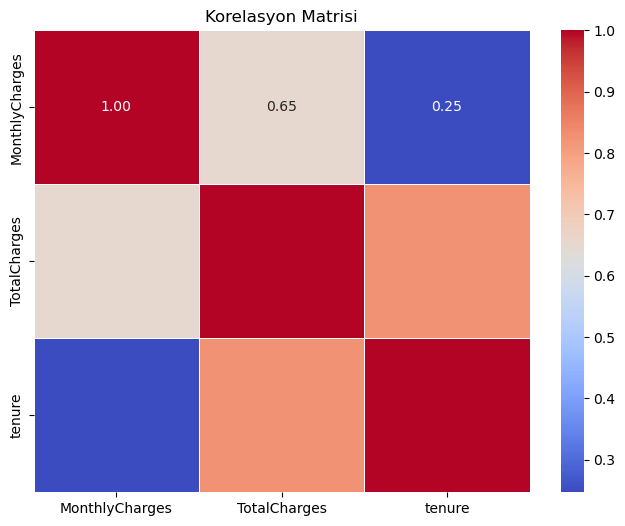

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']


corr_matrix = df[numerical_columns].corr()


print("Korelasyon Matrisi:")
print(corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


In [23]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numerical_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']

X = df[numerical_columns]


X_const = add_constant(X)


vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]


print("VIF Değerleri:")
print(vif_data)


VIF Değerleri:
         Variable        VIF
0           const  14.973839
1  MonthlyCharges   3.225293
2    TotalCharges   9.526697
3          tenure   5.844646


#### Mutual Regression

In [38]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



df = df.drop(columns=['customerID'])


y = df['Churn']


categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Kategorik veriler için Label Encoding veya One-Hot Encoding yapalım
# LabelEncoder kullanarak kategorik verileri sayısallaştırıyoruz (sadece 2 kategori olanlar için)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Churn hedef değişkenini de encode ediyoruz

for col in categorical_columns:
    if df[col].dtype == 'object':  # Eğer kategorik bir değişkense
        df[col] = le.fit_transform(df[col])  # Label encoding uyguluyoruz

X = df.drop(columns=['Churn'])
y = df['Churn']


mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
print(mi_df.sort_values(by='Mutual Information', ascending=False))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")



             Feature  Mutual Information
14          Contract            0.093951
4             tenure            0.074733
8     OnlineSecurity            0.067131
11       TechSupport            0.057943
7    InternetService            0.055041
17    MonthlyCharges            0.048938
10  DeviceProtection            0.047024
9       OnlineBackup            0.046287
18      TotalCharges            0.043329
16     PaymentMethod            0.043252
13   StreamingMovies            0.034548
12       StreamingTV            0.029269
15  PaperlessBilling            0.018845
2            Partner            0.018399
1      SeniorCitizen            0.007779
3         Dependents            0.007395
5       PhoneService            0.002266
0             gender            0.001720
6      MultipleLines            0.000000
Model Accuracy: 0.7853589196872779


Confusion Matrix:
[[917 116]
 [186 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.79      0.78      1407



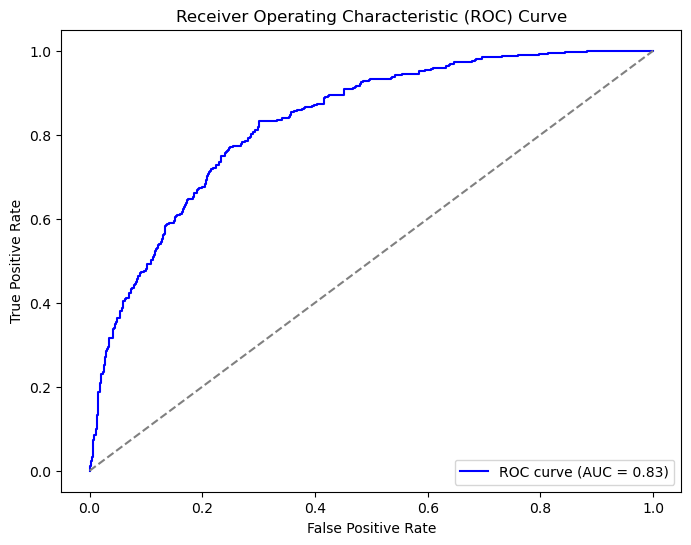

Cross-Validation Accuracy Scores (5-fold): [0.80739161 0.80525942 0.7916074  0.80796586 0.80512091]
Mean Cross-Validation Accuracy: 0.8035


In [44]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Precision, Recall, F1-Score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# 4. Cross-Validation (K-fold Cross-Validation)
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (5-fold): {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")
